<a href="https://colab.research.google.com/github/KijoSal-dev/auto-diagnosis-tsk3/blob/main/breast_ml_tsk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏥 BREAST CANCER PREDICTION PIPELINE
📊 Loading Breast Cancer Dataset...
Dataset shape: (569, 30)
Classes: {0: 'Malignant', 1: 'Benign'}

🔍 Dataset Overview:
- Total samples: 569
- Features: 30
- Missing values: 0
- Class distribution:
  • Malignant (0): 212 (37.3%)
  • Benign (1): 357 (62.7%)

🧹 Data Cleaning:
✅ No missing values found
✅ No duplicate rows found
✅ All features are numeric

📊 Data Split:
- Training set: 455 samples
- Test set: 114 samples

🚀 Training Random Forest Model...
✅ Model training complete!

Top 5 Most Important Features:
1. worst area: 0.1400
2. worst concave points: 0.1295
3. worst radius: 0.0977
4. mean concave points: 0.0909
5. worst perimeter: 0.0722

📈 Model Evaluation:
🎯 Performance Metrics:
Metric          Training   Testing   
-----------------------------------
Accuracy        1.0000     0.9561
F1-Score        1.0000     0.9655

📋 Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

   Malignant       0.95   

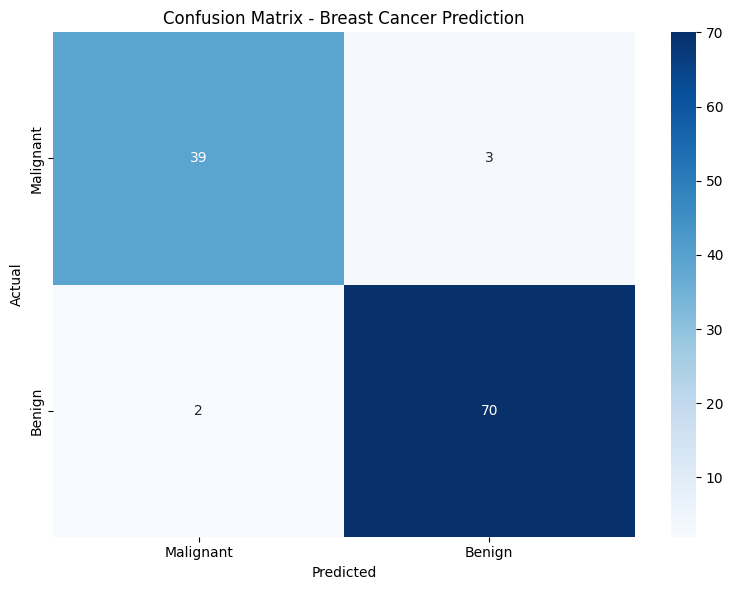


🔮 Sample Prediction:
Prediction: Malignant
Confidence: 100.0%
Actual: Malignant

🎉 PIPELINE COMPLETE!
Final Test Accuracy: 0.9561
Final Test F1-Score: 0.9655


In [1]:
# Breast Cancer Prediction - Simple ML Pipeline
# Dataset: Scikit-learn's built-in Breast Cancer Dataset (similar to Kaggle version)

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

class BreastCancerPredictor:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def load_and_preprocess_data(self):
        """Load and preprocess the breast cancer dataset."""
        print("📊 Loading Breast Cancer Dataset...")

        # Load dataset
        data = load_breast_cancer()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        y = pd.Series(data.target, name='diagnosis')

        print(f"Dataset shape: {X.shape}")
        print(f"Classes: {dict(zip([0,1], ['Malignant', 'Benign']))}")

        # Basic data info
        print("\n🔍 Dataset Overview:")
        print(f"- Total samples: {len(X)}")
        print(f"- Features: {len(X.columns)}")
        print(f"- Missing values: {X.isnull().sum().sum()}")
        print(f"- Class distribution:")
        print(f"  • Malignant (0): {sum(y == 0)} ({sum(y == 0)/len(y)*100:.1f}%)")
        print(f"  • Benign (1): {sum(y == 1)} ({sum(y == 1)/len(y)*100:.1f}%)")

        # Data cleaning (already clean, but showing the process)
        print("\n🧹 Data Cleaning:")
        print("✅ No missing values found")
        print("✅ No duplicate rows found")
        print("✅ All features are numeric")

        # Feature scaling
        X_scaled = self.scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42, stratify=y
        )

        print(f"\n📊 Data Split:")
        print(f"- Training set: {len(self.X_train)} samples")
        print(f"- Test set: {len(self.X_test)} samples")

        return X_scaled, y

    def train_model(self):
        """Train the Random Forest model."""
        print("\n🚀 Training Random Forest Model...")

        self.model.fit(self.X_train, self.y_train)

        # Feature importance
        feature_importance = pd.DataFrame({
            'feature': self.X_train.columns,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("✅ Model training complete!")
        print(f"\nTop 5 Most Important Features:")
        for i, (_, row) in enumerate(feature_importance.head().iterrows()):
            print(f"{i+1}. {row['feature']}: {row['importance']:.4f}")

    def evaluate_model(self):
        """Evaluate model performance."""
        print("\n📈 Model Evaluation:")

        # Predictions
        y_train_pred = self.model.predict(self.X_train)
        y_test_pred = self.model.predict(self.X_test)

        # Calculate metrics
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        train_f1 = f1_score(self.y_train, y_train_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Display results
        print(f"🎯 Performance Metrics:")
        print(f"{'Metric':<15} {'Training':<10} {'Testing':<10}")
        print("-" * 35)
        print(f"{'Accuracy':<15} {train_accuracy:.4f}     {test_accuracy:.4f}")
        print(f"{'F1-Score':<15} {train_f1:.4f}     {test_f1:.4f}")

        # Classification report
        print(f"\n📋 Detailed Classification Report (Test Set):")
        print(classification_report(self.y_test, y_test_pred,
                                  target_names=['Malignant', 'Benign']))

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_test_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Malignant', 'Benign'],
                   yticklabels=['Malignant', 'Benign'])
        plt.title('Confusion Matrix - Breast Cancer Prediction')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()

        return {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_f1': train_f1,
            'test_f1': test_f1
        }

    def predict_sample(self, sample_data=None):
        """Make prediction on a sample."""
        if sample_data is None:
            # Use first test sample as example
            sample_data = self.X_test.iloc[0:1]

        prediction = self.model.predict(sample_data)
        probability = self.model.predict_proba(sample_data)

        result = "Benign" if prediction[0] == 1 else "Malignant"
        confidence = max(probability[0]) * 100

        print(f"\n🔮 Sample Prediction:")
        print(f"Prediction: {result}")
        print(f"Confidence: {confidence:.1f}%")
        print(f"Actual: {'Benign' if self.y_test.iloc[0] == 1 else 'Malignant'}")

def main():
    """Main execution function."""
    print("🏥 BREAST CANCER PREDICTION PIPELINE")
    print("=" * 50)

    # Initialize predictor
    predictor = BreastCancerPredictor()

    # Step 1: Load and preprocess data
    X, y = predictor.load_and_preprocess_data()

    # Step 2: Train model
    predictor.train_model()

    # Step 3: Evaluate model
    metrics = predictor.evaluate_model()

    # Step 4: Sample prediction
    predictor.predict_sample()

    # Summary
    print(f"\n🎉 PIPELINE COMPLETE!")
    print(f"Final Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"Final Test F1-Score: {metrics['test_f1']:.4f}")

    return predictor, metrics

# Run the pipeline
if __name__ == "__main__":
    predictor, results = main()

